<a id="s0"></a><h2 style="color:rgb(127,203,223)">5.0 Klassifikations- und Regressionsverfahren Teil 2</h2>

<a id="s1"></a><h3 style="color:rgb(127,203,223)">5.1 Multilayer Perceptron - eine Einführung</h3>

Das so genannte <b>M</b>ulti<b>l</b>ayer <b>P</b>erceptron (MLP) ist ein klassisches so genanntes neuronales Netz, in dem die den Nervenzellen (Neuronen) entsprechenden Perceptronen in Schichten (Layers) angeordnet sind. Der Begriff Perzeptron geht hierbei auf McCulloch und Pitts zurück, die ihn <b>1943</b> entworfen haben. Die Perzeptronen werden auch als künstliche Neuronen (<b>artifical neurons</b>) bezeichnet. Neuronen sind Nervenzellen, also auf die Erregungsleitung und -Übertragung spezialisierte Zellen, die in ihrer Gesamtheit das Nervensystem in Tieren und Menschen bilden. Das menschliche Gehirn weist ca. 90 Milliarden solcher Neuronen auf. Schauen wir uns zunächst eine schematische Darstellung einer solchen Nervenzelle an:<br><br>

<p style="text-align: center"><img src="pics/Neuron.png" alt="Bild" style="height: 500px; width: 600px;"><br>Quelle: Wikipedia</p><br>

Die Erregung des Neurons erfolgt über die so genannten Dentriten, dies sind die Nervenzellfortsätze anderer Neuronen. Der Zellkörper reagiert auf diese Anregung und kann nun seinerseits eine Anregung über den so genannten Axonhügel erzeugen und über das Axon weiterleiten. Dieses Axon steht nun mit den Dentriten anderer Neuronen über die so genannte Synapse in Kontakt und kann damit wiederum "Information" an andere Neuronen weiterleiten. Die Reizübertragung in den Synapsen erfolgt meistens chemisch. Hierbei werden Botenstoffe, so genannte Neurotransmitter von der sendenden Seite (Präsynapse) in den synaptischen Spalt ausgeschüttet, die sich auf der empfangenden Seite (Postsynapse) an dort vorhandene Membranrezeptoren binden können. Auf diese Weise wird der Reiz nun wieder über die Dentriten der empfangenden Seite an das entsprechende Neuron weitergeleitet. Die Fähigkeit der Synapse, bestimmte Informationen zu übertragen ist nicht fix sondern variabel. Diese so genannte synaptische Plastizität stellt einen neurophysiologischen Mechanismus für Lernprozesse dar. Das im Folgenden erläuterte MLP stellt eine sehr starke Vereinfachung einer solchen Nervenzelle dar, ist jedoch, wie wir noch sehen werden, in der Lage, aufgrund seiner "Plastizität" ebenfalls zu "lernen". Dies wird dann dazu genutzt, MLPs zur Regression bzw. Klassifikation einzusetzen. Schauen wir uns also zunächst den Aufbau des Perzeptrons an:<br><br>  

<p style="text-align: center"><img src="pics/Perceptron.png" alt="Bild" style="height: 200px; width: 400px;"><br>Quelle: Wikipedia</p><br>

Das Perzeptron erhält seine Anregung von $n$ verschiedenen Vorgängern. Jede dieser Anregungen wird durch eine reelle Zahl $x_i$ repräsentiert. Jede Anregung wird mit einem Gewicht $w_i$ gewichtet. Anschließend werden alle diese Anregungen addiert und zum Schluss noch mit einem Schwellwert $\Theta$ versehen. Wir erhalten somit:
$$\Theta+\sum\limits_{i=1}^N w_i\,x_i$$

Diese Anregung geht nun in eine so genannte <b>Aktivierungsfunktion</b> (activation function) ein. Dieses Element ist essentiell für das Neuron und auch für das gesamte neuronale Netz. Würde stattdessen direkt die oben gezeigte Anregung weitergegeben, so würde das aus diesen Neuronen erzeugte Netz schlussendlich <u>nur</u> eine lineare Abbildung darstellen, die natürlich nur von begrenztem Nutzen wäre. Damit dies nicht passiert, muss die Aktivierungsfunktion also <b>nichtlinear</b> sein. Es kommen hierzu unterschiedliche Funktionen zum Einsatz. Die konkrete Auswahl erfolgt beim Design des Netzes und gehört damit zu den so genannten Hyperparametern. Im Folgenden ist eine Übersicht über zwei gängige Aktivierungsfunktionen gegeben:<br><br> 

<p style="text-align: center"><img src="pics/ActivationFunctions.png" alt="Bild" style="height: 400px; width: 700px;"><br>Unterschiedliche Aktivierungsfunktionen: ReLU (rot) und Sigmoid (blau)</p><br>

In rot ist die so genannte <b>Re</b>ctified <b>L</b>inear <b>U</b>nit und in blau die logistische Aktivierungsfunktion gezeigt. Tatsächlich gibt es in gängigen ML-Frameworks eine größere Auswahl an solchen Aktivierungsfunktionen. Die Ausgabe des Perzeptrons ist nun also gleich $A(\Theta+\sum\limits_{i=1}^N w_i\,x_i)$. Das Multilayer Perceptron entsteht nun dadurch, dass mehrere Perzeptronen zu jeweils einer Schicht (Layer) zusammengefasst werden. Die Gesamtheit der Schichten stellt nun das eigentliche Multilayer Perceptron dar. Im Folgenden ist dies schematisch dargestellt:

<p style="text-align: center"><img src="pics/MLP.png" alt="Bild" style="height: 400px; width: 600px;"><br>Quelle: Wikipedia</p><br>

Hierbei sind die Perzeptronen als Kreise dargestellt. Die Informationsweiterleitung erfolgt dann entland der schwarzen Pfeile (Axonen). Da die Information hier nur in einer Richtung verläuft, nämlich von unten nach oben, sprechen wir auch von einem Feedforward-Netz (Feedforward neural network). Die in rot eingezeichnen Perzeptronen (Neuronen) stellen die so genannten Eingabe-Neuronen dar (input neurons). Deren Wert wird vom Benutzer festgelegt. Die grün dargestellten Neuronen stellen eine so genannte verborgene Schicht dar (hidden layer) und das blaue Neuron repräsentiert hierbei das Ausgabe-Neuron (output neuron). Hier kann die "Antwort" des Netzwerkes auf die präsentierte Eingabe abgelesen werden. Die grauen Neuronen sind hierbei so genannte Bias-Neuronen. Diese haben immer den Wert 1 und die Gewichtung der Verbindung ist gerade der Schwellwert $\Theta$.<br>
Bevor wir darauf eingehen, wie ein MLP "lernt", wollen wir einen Schritt zurücktreten und das MLP noch einmal aus einer anderen Warte betrachten. Blenden wir den neurophysiologischen Hintergrund einmal aus, so können wir ein solches MLP auch als eine Abbildung auffassen. Die Eingabe besteht aus den Werten der Eingabe-Neuronen und die Ausgabe entspricht dem Wert des Ausgabe-Neurons bzw. der Ausgabe-Neuronen. Diese Abbildung verfügt über so genannte Hyperparameter, dass sind die Anzahl an Schichten, die Anzahl an Neuronen pro Schicht, die Art der Aktivierungsfunktionen etc.<br>
Des Weiteren verfügt sie auch über Parameter, dies sind die Gewichte aller Verbindungen einschl. der Schwellwerte (biases). Verändern wir diese, so verändert sich auch der Ausgabewert unseres MLP bei gleichen Eingabewerten. Wir können so ein MLP also auch als eine Art von Regressionsmaschine auffassen. Wir müssen nun nur noch herausfinden, wir wir die Gewichte so anpassen, dass das MLP auf eine Eingabe mit der gewünschten Ausgabe antwortet. Wir brauchen also einen Algorithmus, mit dessen Hilfe wir die Gewichte so anpassen, dass das Netz basierend auf Trainingsdaten das gewünschte Verhalten aufzeigt. Dieser Algorithmus beschreibt nicht mehr und nicht weniger als das "Lernen" des neuronalen Netzes. Betrachten wir nun diesen mit <b>Backpropagation</b> bezeichneten Algorithmus. Die Sichtweise auf das Netz als von den Parametern $w_i$ und $\Theta$ abhängige Abbildung wird sich hierbei als nützlich erweisen.<br>
Bevor wir uns dem eigentlichen Algorithmus zuwenden, werden wir zunächst ein Verfahren kennenlernen, welches als <b>Automatisches Differenzieren</b> (Automatic differentiation) bekannt ist. Es handelt sich hierbei um ein Verfahren, um (partielle) Ableitungen mittels eines Algorithmus bis auf Maschinengenauigkeit zu berechnen. Automatisches Differenzieren unterscheidet sich daher sowohl von der symbolischen Ableitung, als auch von der numerischen Ableitung. Während bei der ersteren ein Term für die Ableitung angegeben wird, wird der numerische Wert bei der letzteren lediglich näherungsweise bestimmt. Der Fehler liegt hierbei deutlich oberhalb der Maschinengenauigkeit. Automatisches Differenzieren berechnet also den Wert der (partiellen) Ableitung als Zahl mit einem Fehler, der lediglich durch die Genauigkeit der Maschine (Maschinengenauigkeit) beschränkt wird. Schauen wir uns dies im folgenden Kapitel etwas näher an. 

<a id="s2"></a><h3 style="color:rgb(127,203,223)">5.2 Automatisches Differenzieren</h3>

Beginnen wir mit einem Beispiel. Gegeben sei die Funktion 
$$f(x_1,x_2) :=x_1 \cdot x_2+\sin(x_1)$$<br><br>
Wir möchten von dieser Funktion die partiellen Ableitungen nach den beiden Variablen an einer vorgegebenen Stelle ($x_1=2$ und $x_2=5$) berechnen. Eine direkte Berechnung der partiellen Ableitungen ergibt folgendes Resultat<br><br><br>
$$\frac{\partial f}{\partial x_1}(x_1,x_2) = x_2+\cos(x_1) \qquad \frac{\partial f}{\partial x_2}(x_1,x_2) = x_1$$<br><br>
An der Stelle $(2,5)$ erhalten wir somit für den Gradienten den Wert<br><br>
$$\nabla f(2,5) = \left(\begin{array}{c} \cos(2)+5 \\ 2 \end{array}\right)$$<br><br>
Wir möchten diese Rechnung nun mittels eines Algorithmus darstellen. Hierzu gehen wir wie folgt vor. Wir erstellen aus der Funktionsgleichung einen Baum, dessen Wurzel der zu berechnenden Funktion enspricht:

<p style="text-align: center"><img src="pics/AD01.png" alt="Bild" style="height: 300px; width: 600px;"><br>Darstellung der Funktion $f(x_1,x_2)$ als Baum</p><br>

Die Verarbeitung erfolgt nun von links nach rechts. Wir belegen die Eingabe-Knoten mit den ensprechenden Werten und verschieben diese entlang der Pfeile. In den eckigen Kästchen führen wir dann die entsprechende Funktion aus. Auf der rechten Seite (Wurzel) können wir nun den gewünschten Funktionswert ablesen. Wir werden nun in einem zweiten Durchlauf die partiellen Ableitungen berechnen. Da wir hierbei von der Wurzel beginnend - wie wir noch sehen werden - bis zu den Eingabeknoten von rechts nach links vorgehen, sprechen wir hierbei auch vom so genannten <i>Reverse Mode</i>.<br> Um die partiellen Ableitungen in einem Durchlauf berechnen zu können, müssen wir die "Zwischenergebnisse" in jedem Knoten (mit Ausnahme der Eingabeknoten) speichern. Wir benamsen hierzu die Knoten zunächst einmal:  

<p style="text-align: center"><img src="pics/AD02.png" alt="Bild" style="height: 300px; width: 450px;"><br>Benamsung der Knoten</p><br>

Es gilt nun:<br><br><br>
$$w_3=w_1*w_2 \quad w_4=\sin(w_1) \quad w_5=w_4+w_3$$

Hierbei ist $w_1=x_1$ und $w_2=x_2$. Wir müssen nun die folgenden partiellen Ableitungen für die jeweiligen Knoten bestimmen und die Zwischenergebnisse in selbigen speichern:

<p style="text-align: center"><img src="pics/AD03.png" alt="Bild" style="height: 300px; width: 450px;"><br>Benamsung der Knoten</p><br>

Die Syntax ist hierbei wie folgt. Wir fassen jeden Knoten als einen Operator auf, der einen oder mehrere Eingaben von Vorgängern erhält. Wir speichern nun neben dem aktuellen Wert des Knotens auch noch den Wert seiner (partiellen) Ableitungen. Dies ist in der folgenden Graphik noch einmal dargestellt:

<p style="text-align: center"><img src="pics/AD04.png" alt="Bild" style="height: 200px; width: 300px;"><br>Jeder Knoten speichert neben seinem Wert auch noch den Wert der partiellen Ableitungen nach den Eingangswerten. Dies gilt natürlich für Knoten die nur einen Eingang oder solche, die sehr viele Eingänge besitzen entsprechend</p><br>

Damit besitzen wir nun alle Informationen, die wir brauchen, um in einem Durchlauf, von rechts nach links, also von der Wurzel bis zu den Eingangsknoten den Wert der gesuchten partiellen Ableitungen zu berechnen.<br>
Wir beginnen damit, die erste partielle Ableitung von Knoten $w_5$ entlang der grünen Verbindung zum Knoten $w_4$ zu verschieben. Selbiges tun wir mit der zweiten partiellen Ableitung entlang der gelben Verbindung zum Knoten $w_3$.

<p style="text-align: center"><img src="pics/AD05.png" alt="Bild" style="height: 300px; width: 450px;"><br>Reverse Mode</p><br>

Nun werden die so von links kommenden Werte mit jeder (partiellen) Ableitung im Knoten multipliziert und entlang der zu der jeweiligen Ableitung gehörenden Verbindung weiter nach links verschoben:

<p style="text-align: center"><img src="pics/AD06.png" alt="Bild" style="height: 300px; width: 450px;"><br>Reverse Mode</p><br>

Kommen in einem Knoten mehrere Werte an, so werden diese einfach addiert. In den Eingangsknoten erhalten wir nun gerade die gesuchten partiellen Ableitungen. Wir erhalten somit im Vorwärtsmodus bei gegebenen Eingangswerten den Wert der Funktion. Führen wir dann den Reverse Mode durch, so erhalten wir in den Eingangsknoten die Werte der partiellen Ableitungen der Funktion nach den jeweiligen Variablen (Eingangsknoten).<br>
Neben dem Reverse Mode gibt es auch noch einen so genannten <i>Forward Mode</i>. Dieser macht dann Sinn, wenn die Anzahl an Ausgabe-Knoten die Anzahl an Eingabe-Knoten deutlich übersteigt. In diesem Modus wird dann pro Durchlauf (von links nach rechts) jeder Ausgabe-Knoten nach einer gemeinsamen Variablen abgeleitet.<br>
Es ist jedoch der Reverse Mode, dessen Anwendung im Kontext des MLP auch <b>Backpropagation</b> genannt wird, der uns im folgenden interessiert.<br>

<a id="s3"></a><h3 style="color:rgb(127,203,223)">5.3 Gradient Descent und Backpropagation</h3>

Bevor wir uns jedoch mit der Backpropagation im Detail beschäftigen, kommen wir zunächst einmal zu der grundsätzlichen Frage zurück, wie wir die Gewichte im MLP so anpassen, dass Selbiges die Eingabewerte der Trainingsdaten möglichst optimal auf die vorgegebenen Ausgabewerte abbildet. Hierzu benötigen wir eine Fehlerfunktion, die im Kontext von neuronalen Netzen auch <b>Loss Function</b> genannt wird. Diese Fehlerfunktion "misst" die Abweichung zwischen <b>Ist-Ausgabe</b> und <b>Soll-Ausgabe</b> des neuronalen Netzes. Hierzu belegen wir die Eingabe-Neuronen mit den entsprechenden Eingabewerten und lassen die Ausgabewerte berechnen. Basierend auf beiden wird dann die Loss Function berechnet. 

Es gibt eine Reihe von möglichen Loss Functions. Hier sollen lediglich zwei vorgestellt werden:<br><br><br>

<center><B>Mean Squared Error Loss Function:</B></center><br>
$$L(\underline{y},\underline{o}):=\frac{1}{N}\, \sum\limits_{k=1}^N (y_k-o_k)^2$$<br><br>
Diese Loss Function eignet sich bspw. für die Verwendung des MLP zur Regression. Wir kennen Sie ja bereits aus der linearen Regression.<br><br>

<center><B>Cross-Entropy Loss Function:</B></center><br>
$$L(\underline{y},\underline{o}):=-\sum\limits_{k=1}^N y_k \, \log(o_k)$$<br><br>
Diese Loss Function wird verwendet, wenn die Ausgabe des Netzes als Wahrscheinlichkeit für die Zugehörigkeit zu einer von $N$ möglichen Klassen interpretiert werden soll. Beim Ground Truth Datum $\underline{y}$ handelt es sich dann in aller Regel um einen Vektor, der an einer Stelle den Wert 1 trägt (wahre Klasse) und an allen anderen den Wert 0. Solche Vektoren nennen wir auch <i>one-hot encoded</i>. Hierbei muss sichergestellt werden, dass die $N$ Ausgabeneuronen des Netzes alle einen nichtnegativen Wert annehmen, und sich diese Werte zu 1 addieren. Dies kann generell unter Verwendung der so genannten <a href="https://en.wikipedia.org/wiki/Softmax_function">Softmax function</a> erreicht werden. Die Minimierung der Cross-Entropy (Kreuzentropie) - man beachte, dass die Werte immer nichtnegativ sind - führt zu einer Angleichung der beiden Wahrscheinlichkeitsverteilungen. In diesem Fall würden die Gewichte des MLP also so angepasst werden, dass Selbiges eine Wahrscheinlichkeitsverteilung der Merkmalsvektoren berechnet, die der tatsächlichen (Ground Truth) möglichst gut entspricht.<br>
Beim Spezialfall der binären Klassifikation spricht man auch von der <i>Binary Cross-Entropy Loss Function</i>.

Kommen wir zurück zum MLP. Wir können nun die Eingabedaten als Konstanten und die Gewichte des Netzes als Variablen auffassen. Somit wird der Wert der Loss Function nur noch von den Gewichten abhängen. Nun gilt es die aktuellen Gewichte so zu adaptieren, dass der Wert der Loss Function verkleinert wird (kleinerer Wert bedeutet bessere Übereinstimmung zwischen Ist- und Soll-Wert). Die Loss Function (siehe bspw. oben) ist also eine reellwertige Funktion mehrerer Veränderlicher (Anzahl aller Gewichte einschl. Schwellwerten). Hier kennen wir zum Glück ein entsprechendes Verfahren aus der Numerik. Es handelt sich dabei um das Verfahren des Gradientenabstiegs (<b>Gradient Descent</b>). Dieses wollen wir uns noch einmal anhand eines Geogebra-Skriptes ins Gedächtnis rufen.     

In [ ]:
from IPython.display import IFrame
IFrame(src='https://www.geogebra.org/m/uh8gjse5', width=800, height=600)

Betrachten wir, wie wir den Reverse Mode des automatischen Differenzierens auf das MLP übertragen können. Hierzu verwenden wir wieder ein einfaches Beispiel:<br><br>

<p style="text-align: center"><img src="pics/GDMLP01.png" alt="Bild" style="height: 380px; width: 400px;"><br>Automatisches Differenzieren am Beispiel des MLPs</p><br>

Wir veranschaulichen den Vorgang des <i>Backpropagation</i> am Beispiel des obigen MLPs. Wir haben hierbei eine Eingabeschicht bestehend aus drei Neuronen, eine verborgene Schicht bestehend aus zwei Neuronen und schließlich eine Ausgabeschicht mit zwei Neuronen. Die Neuronen sind mit Bezeichnern versehen, um darauf Bezug nehmen zu können. Wir verbinden die Ausgabeschicht nun noch mit einer Loss Function.

<p style="text-align: center"><img src="pics/GDMLP02.png" alt="Bild" style="height: 350px; width: 400px;"><br>Automatisches Differenzieren am Beispiel des MLPs</p><br>

Wir belegen nun die Eingabeneuronen mit einem Datum des Trainingsdatensatzes und "propagieren" diese Information durch das Netz. Die Werte der Ausgabeneuronen wie auch das zum Input-Datum gehörende Ground-Truth-Datum wird an die Loss Function weitergereicht. Der Wert der Loss Function repräsentiert nun den Fehler des neuronalen Netzes. Schauen wir uns die Information die im Knoten der Loss Function gespeichert wird noch einmal genauer an. Wie beim Beispiel des automatischen Differenzierens speichern wir auch hier die partiellen Ableitungen nach allen Eingaben.

<p style="text-align: center"><img src="pics/GDMLP03.png" alt="Bild" style="height: 300px; width: 300px;"><br>Automatisches Differenzieren am Beispiel des MLPs</p><br>

Berechnen wir nun exemplarisch die partielle Ableitung von $L$ nach dem Gewicht $w_{21}^1$, also $\frac{\partial L}{\partial w_{21}^1}$. Dieses Gewicht gewichtet die im folgenden rot dargestellte Verbindung.

<p style="text-align: center"><img src="pics/GDMLP04.png" alt="Bild" style="height: 350px; width: 400px;"><br>Automatisches Differenzieren am Beispiel des MLPs</p><br>

Der Wert des Neurons $V_{11}$ berechnet sich also zu <br><br><br>$$A(w_{11}^1\,x_1+w_{21}^1\,x_2+w_{31}^1\,x_3+b_1^1)$$<br><br>
Die hochgestellten Indizes stellen keine Exponenten dar sondern beziehen sich auf die zugehörige Schicht des Neurons (hier Layer 1). $A$ stellt die Aktivierungsfunktion dar.<br> Analog zur Loss Function speichern wir natürlich auch in jedem Neuron die aktuelle partielle Ableitung nach jedem Input. Diese wird natürlich schon beim Berechnen des outputs mit berechnet.

<p style="text-align: center"><img src="pics/GDMLP05.png" alt="Bild" style="height: 300px; width: 300px;"><br>Gespeicherte Werte in einem Neuron am Beispiel von Neuron $V_{21}$</p><br>

Wir zuvor beim automatischen Differenzieren werden auch hier die Inputs, die nun von rechts in jedes Neuron einfließen mit der jeweiligen partiellen Ableitung multipliziert und entsprechend weitergereicht. Dies ist in der folgenden Abbildung zu sehen.

<p style="text-align: center"><img src="pics/GDMLP06.png" alt="Bild" style="height: 420px; width: 500px;"><br>Automatisches Differenzieren am Beispiel des MLPs</p><br>

Da der Knoten $V_{11}$ nun direkt vom Gewicht $w_{21}^1$ abhängt, wird die Summe der Eingänge in den Knoten nun mit der (partiellen) Ableitung von $A(w_{11}^1\,x_1+w_{21}^1\,x_2+w_{31}^1\,x_3+b_1^1)$ nach der Variablen $w_{21}^1$ multipliziert. Dies ergibt:<br>

$$\frac{\partial L}{\partial w_{21}^1} = x_2\,A'(w_{11}^1\,x_1+w_{21}^1\,x_2+w_{31}^1\,x_3+b_1^1)\,\left(\frac{\partial L}{\partial V_{21}}\,\frac{\partial V_{21}}{\partial V_{11}}+\frac{\partial L}{\partial V_{22}}\,\frac{\partial V_{22}}{\partial V_{11}}\right)$$

<b>Überzeugen Sie sich durch direktes Nachrechnen, dass dies in der Tat den richtigen Wert für die partielle Ableitung ergibt!</b><br><br>
Der Wert des Gewichtes wird nun mittels der folgenden Formel korrigiert:

$$w_{21}^1 = w_{21}^1 - \epsilon\,\frac{\partial L}{\partial w_{21}^1}$$

$\epsilon$, was wir als Lernrate (learning rate) bezeichnen, stellt hierbei die Schrittweite beim Gradientenabstieg dar (siehe auch GeoGebra-Modell für den Gradientenabstieg). Wir können nun auf diese Weise während der Backpropagation (von rechts nach links) die einzelnen Gewichte aktualisieren. Hierbei müssen wir natürlich auch die Schwellwerte (Biases) mit aktualisieren.<br>

<p style="text-align: center"><img src="pics/Exercise.png" alt="Bild" style="height: 220px; width: 300px;"><br></p><br>
<b><u>Es ist wieder Zeit für ein bisschen Übung ...</b></u><P>
Leiten Sie die der obigen Gleichung entsprechende Gleichung für die Schwellwerte (Biases) her<br><br>

Das Training sieht nun so aus, dass wir im Rahmen einer so genannten Epoche alle Trainingsdaten einmal dem Netz präsentieren und dies anschließend seine Gewichte mittels Backpropagation anpasst. Das Training erfolgt üblicherweise über mehrere Epochen und als Abbruchkriterium können bspw. wieder eine Obergrenze für die Anzahl an Epochen oder der verbliebene mittlere Fehler oder eine zu kleine Änderungsrate des Letzteren von einer Epoche zu nächsten verwendet werden.<br><br>
In den gängigsten Implementierungen von neuronalen Netzen, haben Sie die Möglichkeit, die Gewichte nicht nur nach jedem einzelnen Eingabedatum anzupassen (dies wird auch als <b>Stochastic Gradient Descent</b> (SGD) bezeichnet), wie oben beschrieben, sondern stattdessen mehrere Eingabedaten zu präsentieren und den Gradienten anschließend zu berechnen. Hierbei wird die Loss Function zunächst über die einzelnen Beispiele gemittelt. Handelt es sich bei den mehreren Beispielen immer noch nur um eine Teilmenge der gesamten Trainingsmenge, so sprechen wir hierbei von einem <b>Mini Batch</b>. Ideal wäre die Berechnung des Gradienten unter Verwendung aller Trainingsbeispiele auf einmal, dies ist jedoch insbesondere bei sehr großen Netzen (Deep Learning) aufgrund des damit verbundenen Speicheraufwandes häufig nicht möglich.

<p style="text-align: center"><img src="pics/Exercise.png" alt="Bild" style="height: 220px; width: 300px;"><br></p><br>
<b><u>Es ist wieder Zeit für ein bisschen Übung ...</b></u><P>
<ul>    
<li>Was ist der gravierende Unterschied zwischen dem SGD und dem eigentlichen Gradienten (Verwendung aller Trainingsdaten)?</li>
    <li>Verwenden Sie die <a href="https://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron">MLP-Implementierung in sklearn</a> sowie den Iris-Datensatz zur Klassifikation. Überlegen Sie, welche Loss Function hier am ehesten geeignet ist</li>
    </ul>

<a id="s4"></a><h3 style="color:rgb(127,203,223)">5.4 Projektaufgabe</h3>

Im Rahmen dieser Projektaufgabe soll die Implementierung eines Multilayer Perceptrons vervollständigt werden. Hierzu wird eine objektorientierte Realisierung des MLPs in Python zur Verfügung gestellt, bei der jedoch zwei Member-Functions nicht implementiert worden sind. Sie sollen diese Implementierung vornehmen, dass MLP also vervollständigen und die korrekte Funktionalität des MLP anhand von ausgewählten Beispielen verifizieren. Die Projektaufgabe kann in Gruppen von maximal 4 Studierenden bearbeitet werden. Die Ergebnisse sind in Form eines kurzen Vortrages (<b>maximal 15 Minuten</b> wobei <u>jedes Projektmitglied einen Teil vertreten muss</u>) sowie einer schriftlich zu erstellenden <b>Dokumentation</b> (<b>einschl. Quellcode</b>) nachzuweisen.<br>
Details zu der bereits existierenden Realisierung, insbesondere eine Übersicht über die verwendeten Klassen sowie dem Programm-Design, werden in der Lehrveranstaltung erläutert.

Besprechung der Projektaufgabe erfolgt am <b>7.6.2024</b><br>
Abgabe der Dokumentation sowie Vorstellung der Ergebnisse am <b>19.7.2024</b><br><br>

<p style="text-align: center"><img src="pics/MLP-Project.png" alt="Bild" style="height: 300px; width: 350px;"><br>Quelle: Wikipedia</p><br>

<a id="s5"></a><h3 style="color:rgb(127,203,223)">5.5 Anwendungen des MLP</h3>

Betrachten wir erneut den Iris-Datensatz und verwenden diesmal das MultiLayer Perzeptron zur Klassifikation:

/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean error in epoch 0 : 0.241369265571671
Mean error in epoch 500 : 0.10160884186521965
Mean error in epoch 1000 : 0.09953347782383433
Mean error in epoch 1500 : 0.10431022817663058
Mean error in epoch 2000 : 0.0930273625406099
Mean error in epoch 2500 : 0.1023636791079929
Mean error in epoch 3000 : 0.09232745482210518
Mean error in epoch 3500 : 0.09231659711749626
Mean error in epoch 4000 : 0.09375641800767921
Mean error in epoch 4500 : 0.09928716433110259
training has been finished ...
(15,)


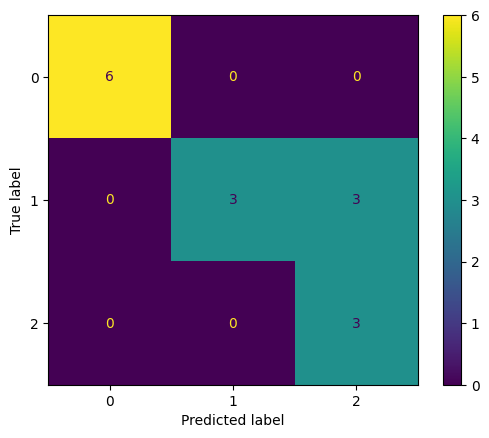

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
import sys
sys.path.insert(0, './code/MLP')
from MLP import *

# load dataset
X,y = load_iris(return_X_y=True)

# data splitting (training and test)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

# since y consists only of the label (0,1 or 2) we have to map that to a vector first
y_onehot=OneHotEncoder(sparse=False).fit_transform(y_train.reshape((len(y_train),1)))

# now setup the actual MLP
mlp = MultiLayerPerceptron(np.array([4,1,3]),'meansquared')
mlp.learn(X_train,y_onehot, 0.5, 5000, output_epochs=500)

# Let's check the MLP's performance
y_pred = mlp.predictAll(X_test)

# Since the output values are continues we have to apply a threshold to them first
yy_pred = np.argmax(y_pred,axis=1)
print(yy_pred.shape)

cm = confusion_matrix(y_test, yy_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()







Da es sich um eine Klassifikationsaufgabe handelt, würden wir die Werte der Ausgabeneuronen (-Perzeptronen) gerne als Wahrscheinlichkeiten für die jeweilige Klasse interpretieren. Gegenwärtig verwenden wir das MLP jedoch zur Regression. Die eigentliche Klassenzuordnung findet nur durch die Auswahl des jeweils größten Eintrags statt. Wir wechseln daher die Loss Function und verwenden statt des mittleren quadratischen Fehlers, wie er sich zur Regression eignet, nun die Kreuzentropie (Cross Entropy). Die Kreuz-Entropie erwartet jedoch eine Ausgabe in der Art, dass alle Ausgabeneuronen einen nicht-negativen Wert zurückgeben und sich die Werte aller Ausgabeneuronen zu 1 summieren. Kurz gesagt muss sich die Ausgabe des MLP selber als eine Wahrscheinlichkeitsverteilung interpretieren lassen. Wie erreichen wir dies?<br>
In der Implementierung des MLP werden Sie sehen, dass dieser Schritt in die Berechnung der <i>Cross Entropy Loss Function</i> integriert worden ist. Da dieses Vorgehen jedoch unabhängig von der Loss Function möglich ist und eine eigenständige Bezeichnung besitzt, wollen wir es kurz betrachten.<br>
Um einen beliebigen (numerischen) Ausgabevektor so umzuformen, dass er die Eigenschaften einer Wahrscheinlichkeitsverteilung besitzt, verwenden wir die so genannte <b>Softmax-Funktion</b>. Gehen wir von einem Vektor $\underline{y}=(y_1, \dots, y_N)^T$ aus, so wird dieser mittels der Softmax-Funktion wie folgt transformiert:


$$ \tilde{\underline{y}} = (\tilde{y}_1,\dots,\tilde{y}_N)^T \quad \mbox{ mit } \quad \tilde{y}_i = \frac{e^{y_i}}{\sum\limits_{n=1}^N e^{y_n}}$$

Die Softmax-Funktion finden Sie in allen modernen Frameworks für neuronale Netze. Betrachten wir also noch einmal das obige Beispiel und verwenden wir nun als Loss Function die Kreuzentropie:

/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean error in epoch 0 : 1.0986508255941432
Mean error in epoch 100 : 1.098637635654766
Mean error in epoch 200 : 1.098627570902737
Mean error in epoch 300 : 1.0986191049673506
Mean error in epoch 400 : 1.0986114897667825
Mean error in epoch 500 : 1.0986042335443598
Mean error in epoch 600 : 1.0985969827415887
Mean error in epoch 700 : 1.0985894103959153
Mean error in epoch 800 : 1.0985811388132238
Mean error in epoch 900 : 1.0985716485893315
Mean error in epoch 1000 : 1.0985600687664865
Mean error in epoch 1100 : 1.0985447308260625
Mean error in epoch 1200 : 1.0985215890603495
Mean error in epoch 1300 : 1.0984779642052014
Mean error in epoch 1400 : 1.0983456147803083
Mean error in epoch 1500 : 1.0967781378321033
Mean error in epoch 1600 : 0.9968321161204996
Mean error in epoch 1700 : 0.8677456662597869
Mean error in epoch 1800 : 0.7986872179571608
Mean error in epoch 1900 : 0.7508491544239062
Mean error in epoch 2000 : 0.6880798603928382
Mean error in epoch 2100 : 0.6439456835314734
Me

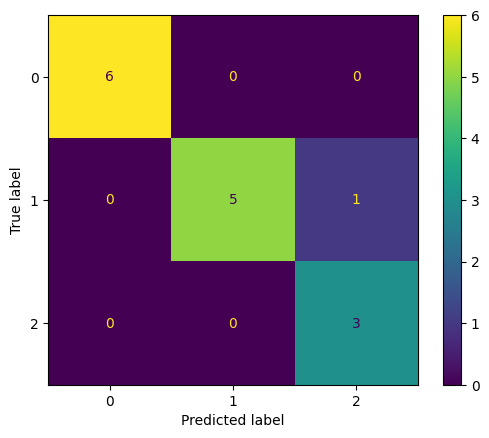

In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import sys
sys.path.insert(0, './code/MLP')
from MLP import *

# load dataset
X,y = load_iris(return_X_y=True)

# data splitting (training and test)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

# since y consists only of the label (0,1 or 2) we have to map that to a vector first
y_onehot=OneHotEncoder(sparse=False).fit_transform(y_train.reshape((len(y_train),1)))

#scaler = MinMaxScaler()
#scaler.fit(X)
#XX_train=scaler.transform(X_train)
#XX_test=scaler.transform(X_test)

# now setup the actual MLP
mlp = MultiLayerPerceptron(np.array([4,10,3]),'crossentropy')
mlp.learn(X_train,y_onehot, 0.01
          , 3000, output_epochs=100)

# Let's check the MLP's performance
y_pred = mlp.predictAll(X_test)

# Since the output values are continues we have to apply a threshold to them first
yy_pred = np.argmax(y_pred,axis=1)
print(yy_pred.shape)

cm = confusion_matrix(y_test, yy_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()



Kommen wir nun zu einer weiteren interessanten Anwendung des MLPs, dem so genannten Autoencoder. Autoencoder zählen zu den unüberwachten Lernverfahren und dienen dazu, zu gegebenen Daten eine effiziente Kodierung zu finden. Hierunter können wir zum einen eine Kompression verstehen (wir wollen dieselbe Information mit weniger Daten beschreiben) als auch die Extraktion relevanter Information, aus der die ursprünglichen Daten wieder weitestgehend zurückgewonnen werden können. Autoencoder werden daher u.a. auch zur Dimensionsreduktion verwendet. Die ersten Anwendungen des Autoencoder gehen auf die 80'er Jahre des letzten Jahrhunderts zurück, wo sie zur Dimensionsreduktion sowie dem "Erlernen" relevanter Merkmale verwendet worden sind. Wir werden im nächsten Kapitel, dass eine erste Einführung in die Theorie des <u>Deep Learning</u> geben wird, ebenfalls nochmal auf die Autoencoder zurückkommen. Unter anderem schauen wir uns diese nochmal im Kontext von <a href="https://en.wikipedia.org/wiki/Generative_model">Generative Models</a> an, von denen Sie bereits ein Beispiel in Form der <i><a href="Chapter04.ipynb#s5">Gaussian Mixture Models</a></i> kennengelernt haben.<br>
Beginnen wollen wir jedoch mit einem einfachen linearen Beispiel zur Dimensionsreduktion. Wir verwenden dreidimensionale Merkmale und wollen diese mittels einer zweidimensionalen Repräsentation darstellen. Hierzu erzeugen wir ein Multilayer Perzeptron, welches über 3 Eingangsneuronen und drei Ausgangsneuronen verfügt. Dazwischen soll sich eine verborgene Schicht befinden, die aus lediglich 2 Neuronen besteht. Als Aktivierungsfunktion verwenden wir die lineare Funktion $x \mapsto x$. Das MLP hat also die folgende Gestalt:

<a id="s8"></a><p style="text-align: center"><img src="pics/Autoencoder.png" alt="Bild" style="height: 300px; width: 350px;"><br>Einfacher Autoencoder</p><br>

Anforderung besteht nun darin, dass der gegebene Input am Ausgang möglichst exakt rekonstruiert wird. Wir verwenden daher dieselben Daten sowohl für den In- als auch für den Output. Ein Klassenlabel ist also nicht erforderlich, weshalb es sich hierbei eben auch um ein Verfahren des unüberwachten Lernens handelt. Da es sich des Weiteren um eine Regression und nicht um eine Klassifikation handelt, werden wir als Loss Function wieder das mittlere Fehlerquadrat verwenden. Die in der Dimension reduzierten Merkmale können nach dem Training sowie dem Anlegen eines Datums an die Eingabeschicht einfach den Neuronen in der verborgenen Schicht entnommen werden. In diesem Fall handelt es sich also um eine Reduktion von 3 in 2 Dimensionen. Schauen wir uns das Ganze nun einmal anhand eines Bespiels an:

Mean error in epoch 0 : 2.5893837159623194
training has been finished ...


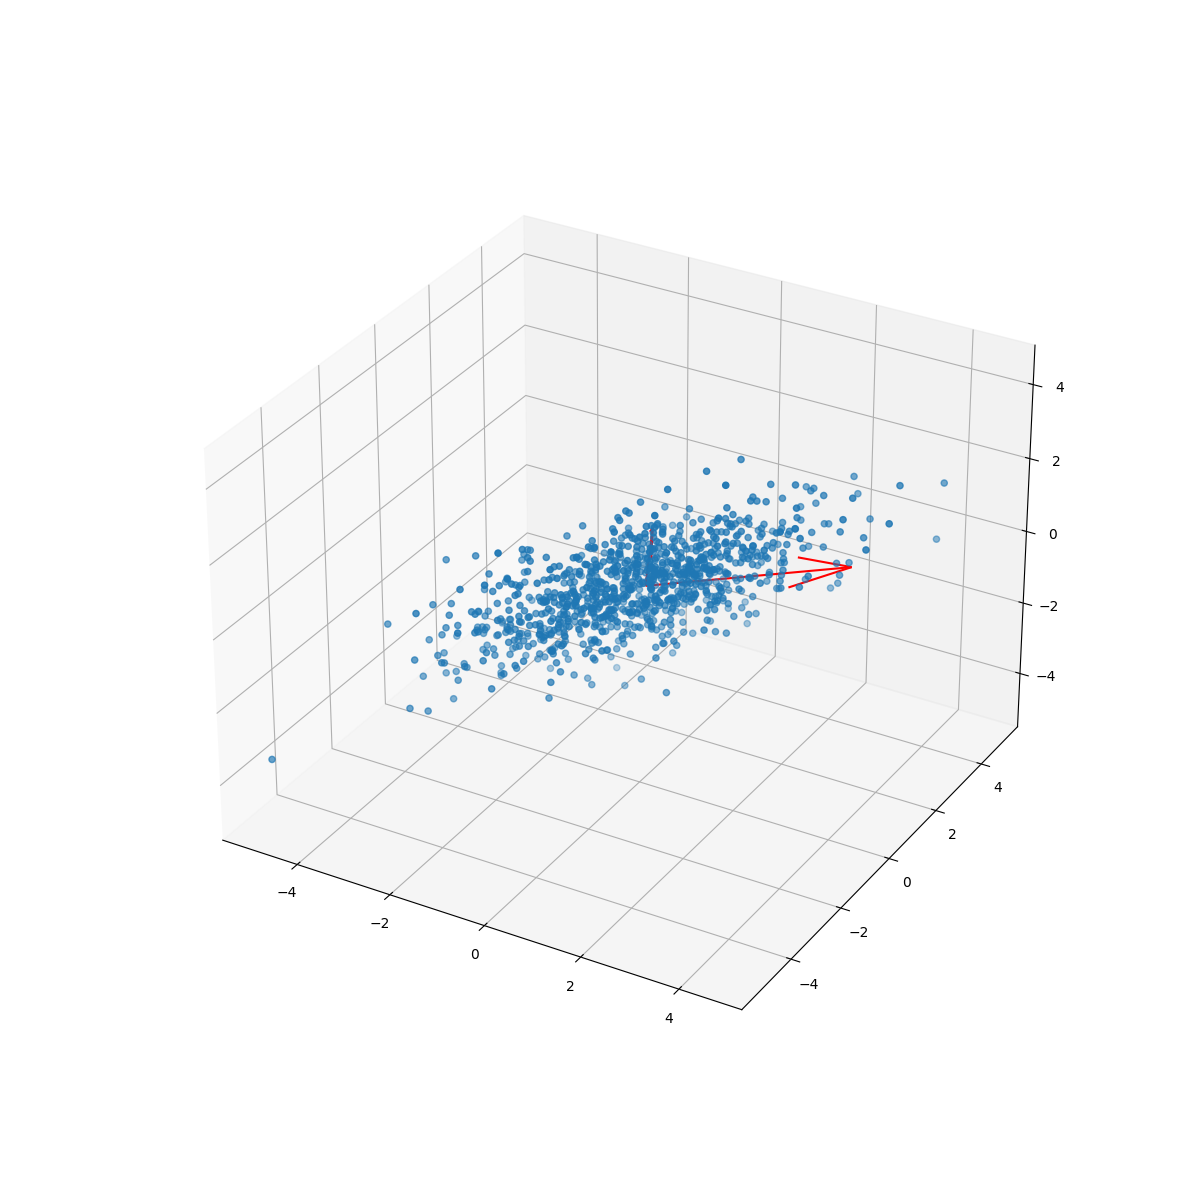

In [6]:
# In order to make matplotlib's output dynamical this had to be done: pip install --upgrade jupyterlab ipympl

%matplotlib widget 
import numpy as np
import sys
sys.path.insert(0, './code/MLP')
from MLP import *
import matplotlib.pyplot as plt
from scipy.stats import *
from ipywidgets import interactive, fixed
import ipywidgets as widgets


# plot of 3D point distribution
cov=np.array([[2,0.8,1.3],[0.8,2,-0.3],[1.3,-0.3,2]])
mean=np.array([0,0,0])
pdf=multivariate_normal(cov=cov, mean=mean,seed=42)
samples=pdf.rvs(size=1000)

mlp = MultiLayerPerceptron(np.array([3,2,3]),'meansquared',activationFunction='linear')
mlp.learn(samples,samples,0.00005,100,output_epochs=101)

# extract vectors spanning the linear manifold
meanVector   = np.zeros(3)
meanVector[0] = mlp.getLayer(2).getPerceptron(0).getBias()
meanVector[1] = mlp.getLayer(2).getPerceptron(1).getBias()
meanVector[2] = mlp.getLayer(2).getPerceptron(2).getBias()

weights1 = mlp.getLayer(2).getPerceptron(0).getWeights()
weights2 = mlp.getLayer(2).getPerceptron(1).getWeights()
weights3 = mlp.getLayer(2).getPerceptron(2).getWeights()

firstVector  = np.array([weights1[0],weights2[0],weights3[0]])
secondVector = np.array([weights1[1],weights2[1],weights3[1]])

soa = np.array([[meanVector[0],meanVector[1], meanVector[2], firstVector[0], firstVector[1], firstVector[2]], [meanVector[0],meanVector[1], meanVector[2], secondVector[0], secondVector[1], secondVector[2]]])
X, Y, Z, U, V, W = zip(*soa)

#%matplotlib inline
fig = plt.figure(1, figsize=(12,12))
ax =plt.axes(projection='3d')
ax.scatter3D(samples[:,0],samples[:,1],samples[:,2])
ax.quiver(X, Y, Z, U, V, W, length=5, color='red')
plt.show()


Da es sich um ein lineares Modell handelt, alle (dreidimensionalen) Merkmale werden in der durch die beiden rot eingezeichneten Vektoren dargestellten Basis entwickelt, bietet sich der Verlgeich zur <a href="Chapter04.ipynb#s1">Hauptkomponentenanalyse</a> an:  

In [7]:
%matplotlib widget 
import numpy as np
import sys
sys.path.insert(0, './code/MLP')
from MLP import *
import matplotlib.pyplot as plt
from scipy.stats import *
from sklearn.decomposition import PCA
from ipywidgets import interactive, fixed
import ipywidgets as widgets

def showResults(showPoints=True):
    # plot of 3D point distribution
    cov=np.array([[2,0.8,1.3],[0.8,2,-0.3],[1.3,-0.3,2]])
    mean=np.array([0,0,0])
    pdf=multivariate_normal(cov=cov, mean=mean,seed=42)
    samples=pdf.rvs(size=1000)

    # let's do a pca on these data points
    pca = PCA(n_components=2)
    pca.fit(samples)
    firstAxis  = pca.inverse_transform(np.array([1,0]))
    secondAxis = pca.inverse_transform(np.array([0,1]))

    mlp = MultiLayerPerceptron(np.array([3,2,3]),'meansquared',activationFunction='linear')
    mlp.learn(samples,samples,0.00005,200,output_epochs=201)

    # extract vectors spanning the linear manifold
    meanVector   = np.zeros(3)
    meanVector[0] = mlp.getLayer(2).getPerceptron(0).getBias()
    meanVector[1] = mlp.getLayer(2).getPerceptron(1).getBias()
    meanVector[2] = mlp.getLayer(2).getPerceptron(2).getBias()

    weights1 = mlp.getLayer(2).getPerceptron(0).getWeights()
    weights2 = mlp.getLayer(2).getPerceptron(1).getWeights()
    weights3 = mlp.getLayer(2).getPerceptron(2).getWeights()

    firstVector  = np.array([weights1[0],weights2[0],weights3[0]])
    secondVector = np.array([weights1[1],weights2[1],weights3[1]])

    soa = np.array([[meanVector[0],meanVector[1], meanVector[2], firstVector[0], firstVector[1], firstVector[2]], [meanVector[0],meanVector[1], meanVector[2], secondVector[0], secondVector[1], secondVector[2]]])
    X, Y, Z, U, V, W = zip(*soa)

    soa2 = np.array([[meanVector[0],meanVector[1], meanVector[2], firstAxis[0], firstAxis[1], firstAxis[2]], [meanVector[0],meanVector[1], meanVector[2], secondAxis[0], secondAxis[1], secondAxis[2]]])
    XX, YY, ZZ, UU, VV, WW = zip(*soa2)

    %matplotlib widget
    fig = plt.figure(1, figsize=(12,12))
    ax =plt.axes(projection='3d')
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])
    ax.set_zlim([-5, 5])
    if (showPoints):
        ax.scatter3D(samples[:,0],samples[:,1],samples[:,2])
    ax.quiver(X, Y, Z, U, V, W, length=5, color='red')
    ax.quiver(XX, YY, ZZ, UU, VV, WW, length=5, color='green')
    plt.show()
    
v=interactive(showResults, showPoints=True)
v     


interactive(children=(Checkbox(value=True, description='showPoints'), Output()), _dom_classes=('widget-interac…

Wir sehen, dass wir zu annähernd gleichen Ergebnissen wie mit der PCA kommen.<br>
Betrachten wir nun noch ein nichtlineares Beispiel. Hierzu erzeugen wir uns wiederum Punkte im dreidimensionalen Raum, die nun jedoch auf der Einheitssphäre liegen. Wir setzen wieder einen Autoencoder ein und analysieren das Ergebnis.<br><br>

In [8]:
%matplotlib widget 
import numpy as np
import sys
sys.path.insert(0, './code/MLP')
from MLP import *
import matplotlib.pyplot as plt
from scipy.stats import *
from sklearn.decomposition import PCA
from ipywidgets import interactive, fixed
import ipywidgets as widgets

def showResults(showPoints=True):
    # plot of 3D point distribution
    phis   = uniform.rvs(loc=0, scale=2*np.pi, size=800)
    thetas = uniform.rvs(loc=-np.pi/2, scale=np.pi, size=800)
    X = np.cos(phis)*np.cos(thetas)
    Y = np.sin(phis)*np.cos(thetas)
    Z = np.sin(thetas)
    samples= np.vstack((X,Y,Z)).T
    
    fig = plt.figure(1, figsize=(12,12))
    ax =plt.axes(projection='3d')
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])
    if (showPoints):
        ax.scatter3D(samples[:,0],samples[:,1],samples[:,2])
        #ax.scatter3D(decoded_samples1[:,0], decoded_samples1[:,1], decoded_samples1[:,2], color='red')
        #ax.scatter3D(decoded_samples2[:,0], decoded_samples2[:,1], decoded_samples2[:,2], color='yellow')
    
    
showResults()    


In [9]:
%matplotlib widget 
import numpy as np
import sys
sys.path.insert(0, './code/MLP')
from MLP import *
import matplotlib.pyplot as plt
from scipy.stats import *
from sklearn.decomposition import PCA
from ipywidgets import interactive, fixed
import ipywidgets as widgets

def showResults(showPoints=True):
    # plot of 3D point distribution
    phis   = uniform.rvs(loc=0, scale=2*np.pi, size=800)
    thetas = uniform.rvs(loc=-np.pi/2, scale=np.pi, size=800)
    X = np.cos(phis)*np.cos(thetas)
    Y = np.sin(phis)*np.cos(thetas)
    Z = np.sin(thetas)
    samples= np.vstack((X,Y,Z)).T
    
    fig = plt.figure(1, figsize=(12,12))
    ax =plt.axes(projection='3d')
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])
    mlp = MultiLayerPerceptron(np.array([3,5,2,5,3]),'meansquared',activationFunction='tanh')
    mlp.learn(samples, samples, 0.05, 300, output_epochs=50)
    mlp.learn(samples, samples, 0.005, 300, output_epochs=50)
    mlp.learn(samples, samples, 0.0001, 300, output_epochs=50)
    
    # check to eliminate encoder structure
    encoder_mlp = MultiLayerPerceptron(np.array([3,5,2]),'meansquared',activationFunction='tanh')
    encoder_mlp.layers[0]=mlp.getLayer(0)
    encoder_mlp.layers[1]=mlp.getLayer(1)
    encoder_mlp.layers[2]=mlp.getLayer(2) 

    decoder_mlp = MultiLayerPerceptron(np.array([2,5,3]),'meansquared',activationFunction='tanh')
    decoder_mlp.layers[0]=mlp.getLayer(2)
    decoder_mlp.layers[1]=mlp.getLayer(3)
    decoder_mlp.layers[2]=mlp.getLayer(4)
    
    # create encoded samples
    #encoded_samples = encoder_mlp.predictAll(samples)
    dummy = np.arange(-1,1,0.001)
    zeros = np.zeros(len(dummy))
    encoded_samples1 = np.vstack((dummy,zeros)).T
    encoded_samples2 = np.vstack((zeros, dummy)).T

    decoded_samples1 = decoder_mlp.predictAll(encoded_samples1)
    decoded_samples2 = decoder_mlp.predictAll(encoded_samples2)
    
    if (showPoints):
        ax.scatter3D(samples[:,0],samples[:,1],samples[:,2])
        ax.scatter3D(decoded_samples1[:,0], decoded_samples1[:,1], decoded_samples1[:,2], color='red')
        ax.scatter3D(decoded_samples2[:,0], decoded_samples2[:,1], decoded_samples2[:,2], color='yellow')
    
    
showResults()    


Mean error in epoch 0 : 0.253741760933825
Mean error in epoch 50 : 0.0862519195296646
Mean error in epoch 100 : 0.08634978499978187
Mean error in epoch 150 : 0.08645444465354853
Mean error in epoch 200 : 0.08631458045525077
Mean error in epoch 250 : 0.08632338200775765
training has been finished ...
Mean error in epoch 0 : 0.0851671851163823
Mean error in epoch 50 : 0.08458463938582131
Mean error in epoch 100 : 0.0845708139493026
Mean error in epoch 150 : 0.08457627426376094
Mean error in epoch 200 : 0.08451623122281746
Mean error in epoch 250 : 0.08457156146868257
training has been finished ...
Mean error in epoch 0 : 0.08433777691032424
Mean error in epoch 50 : 0.08431481261598034
Mean error in epoch 100 : 0.08431458387517278
Mean error in epoch 150 : 0.0843143537084265
Mean error in epoch 200 : 0.08431443411951095
Mean error in epoch 250 : 0.08431431695301082
training has been finished ...


<a id="s6"></a><h3 style="color:rgb(127,203,223)">5.6 Support Vector Machine</h3>

Die Support Vector Machine, kurz SVM, wurde in den 90'er Jahren des vergangenen Jahrhunderts von Valdimir Vapnik und anderen entwickelt. Sie kann zur Klassifikation als auch zur Regression verwendet werden. Bis zur Einführung der Deep-Learning basierten Verfahren war sie für viele Anwendungen aufgrund der Kompaktheit sowie der Performanz prädestiniert. SVMs gehören zum überwachten Lernen, benötigen also annotierte Daten. Beginnen wir mit der einfachsten Variante, der linearen SVM sowie <i>linear separablen</i> Daten. Daten im $\mathbb{R}^2$ sind genau dann separabel, wenn wir eine Gerade finden können, die die Ebene so in zwei Halbebenen unterteilt, dass alle Daten der einen Klasse in dem einen und alle Daten der anderen Klasse im anderen Halbraum liegen. Der Begriff lässt sich unmittelbar auf höherdimensionale Daten übertragen. Schauen wir uns ein Beispiel an:

<p style="text-align: center"><img src="pics/SVM01.png" alt="Bild" style="height: 420px; width: 500px;"><br>Linear separable Daten mit 2 verschiedenen trennenden Geraden</p><br>

Die SVM findet nun die Lösung der folgenden Optimierungsaufgabe:<br><br>
$$\mbox{Minimiere den Ausdruck }\frac{1}{2}\,||\underline{w}||_2^2 \quad \mbox{durch Variation von }\underline{w} \mbox{ und }b, \mbox{ so dass die Nebenbedingung } y_i\,\left(<\underline{w}|\underline{x}_i>+b\right) \geq 1 \quad  \mbox{für alle Trainingsdaten erfüllt ist}$$

Dies bedeutet anschaulich, dass der so genannte <i>Margin</i>, dies ist die Summe der Abstände zwischen dem nächstgelegenen positiven und negativen Datum (Dicke des gelben Bereiches in der folgenden Abbildung), maximiert wird. Wir gehen hierbei davon aus, dass jedes Datum entweder das Label $+1$ oder $-1$ trägt.<br><br>

<p style="text-align: center"><img src="pics/SVM02.png" alt="Bild" style="height: 500px; width: 500px;"><br>Quelle: Wikipedia</p><br>

Bei der Klassifikation eines neuen Datum $\underline{x}$ wird dann lediglich der Ausdruck $<\underline{w}|\underline{x}>+b$ berechnet und das Vorzeichen entscheidet dann über die Klassenzugehörigkeit.

Im allgemeinen sind die Daten jedoch nicht linear separabel, so dass in diesem Fall eine Erweiterung des obigen Verfahrens zur Anwendung kommt. Hierbei werden mögliche Verletzungen der Nebenbedingungen jeweils durch eine so genannte Schlupfvariable $\xi_i:=\max\left(0,1-y_i\,\left(<\underline{w}|\underline{x}>+b\right)\right)$ geahndet. Die Optimierungsaufgabe ergibt sich dann somit zu:<br><br>
$$\mbox{Minimiere den Ausdruck }\frac{1}{2}\,||\underline{w}||_2^2 +C\,\sum\limits_{i=1}^N \xi_i \quad \mbox{durch Variation von }\underline{w} \mbox{ und }b$$

Der Faktor $C$ wird dazu verwendet, einen Tradeoff zwischen einem möglichst großen Margin auf der einen und einem möglichst kleinen Fehler auf der anderen Seite zu erreichen. Die Tatsache, dass sich zeigen lässt, dass $\underline{w}$ sich als Linearkombination von einigen Trainingsbeispielen $\underline{x}_i$ darstellen lässt, den so genannten <b>Support-Vektoren</b> hat dem Verfahren seinen Namen gegeben. Die klassische Lösung der Optimierungsaufgabe erfolgt durch Überführung in ein s.g. duales Problem, welches dann durch quadratische Programmierung gelöst werden kann. Es stehen jedoch auch moderne auf Gradientenverfahren basierende Algorithmen zur Verfügung.<br>
Die SVM gilt aufgrund ihrer Konstruktion als besonders robust gegenüber Overfitting. Der im folgenden erläuterte <i>Kernel-Trick</i> sowie die Tatsache, dass die Berechnung sowohl hinsichtlich Speicherbedarf als auch bzgl. der Anzahl an Rechenoperationen sehr effizient ist, haben dieses Verfahren sehr populär gemacht.

<a id="s7"></a><h4 style="color:rgb(127,203,223)">5.6.1 Der Kernel-Trick</h4>

Wir wollen den Kernel-Trick anhand des folgenden Beispiels erläutern. In der ersten der beiden folgenden Abbildungen sind die zweidimensionalen Merkmale für zwei unterschiedliche Klassen (rot und blau) dargestellt. Es ist offensichtlich, dass diese Daten nicht linear separabel sind. In dem wir diese Daten nun jedoch in den dreidimensionalen Raum abbilden mittels:<br><br>
$$\Phi(x,y):=\left(x,y,\sqrt{x^2+y^2}\right)$$<br><br>
erhalten wir die rechts gezeigte dreidimensionale Verteilung. Diese ist nun offensichtlich linear separabel.

<p style="text-align: center"><img src="pics/SVM03.png" alt="Bild" style="height: 500px; width: 500px;"><img src="pics/SVM04.png" alt="Bild" style="height: 800px; width: 1200px;"><br>Nicht linear separable Merkmalsverteilung (links). Nachdem die Daten geeignet in den dreidimensionalen Raum abgebildet worden sind, sind sie nun linear separabel (rechts)</p><br>

Der Kerneltrick besteht nun zunächst einmal darin, dass wir die Daten in einen höherdimensionalen Raum abbilden und die trennende Hyperebene in diesem Raum berechnen. Tatsächlich jedoch transformieren wir die Eingabedaten gar nicht. Wir nutzen stattdessen aus, dass im Algorithmus (s.o.) nur Skalarprodukte auftreten. Gehen wir also von folgender Transformation aus:<br><br>
$$\begin{eqnarray} \Phi: \mathbb{R}^N  &\longrightarrow& V \\
\underline{x} &\mapsto& \Phi\left(\underline{x}\right) \end{eqnarray}$$<br><br>
so geht in die Berechnung nur das Skalarprodukt $<\underline{w}|\Phi\left(\underline{x}\right)>_{V}+b$ ein. $\underline{w}$ lässt sich ja, wie oben angemerkt, ebenfalls als Linearkombination der Support-Vektoren beschreiben. Es müssen also für die Klassifikation lediglich Innenprodukte zwischen transformierten Merkmalsvektoren berechnet werden. Hierbei setzen wir jedoch voraus, dass es sich beim Raum $V$ auch wieder um einen (vollständigen) Innenproduktraum handelt. Für das Innenprodukt in $V$ können wir dann auch schreiben:<br><br>
$$<\Phi\left(\underline{x}_1\right)|\Phi\left(\underline{x}_2\right)> =: k\left(\underline{x}_1,\underline{x}_2\right)$$<br><br>
und nennen $k$ die so genannte Kernel-Funktion. Tatsächlich wird in der Praxis in der Regel der umgekehrte Weg beschritten. Man legt eine Kernel-Funktion $k$ fest, für die man zeigen kann (<a href="https://en.wikipedia.org/wiki/Mercer%27s_condition">Mercers Condition</a>), dass diese zu einem geeigneten Innenproduktraum gehört. Dieser Kernel-Trick läßt sich auch auf andere lineare Verfahren, bspw. der PCA, anwenden. Eine Auswahl von unterschiedlichen Kernel-Funktionen stellen die entsprechenden Bibliotheken (bspw. scikit-learn) zur Verfügung.<br>
Weitere Informationen und Details finden Sie bspw. in <a href="https://www.dbs.ifi.lmu.de/Lehre/KDD/WS1011/skript/kdd-3-klassifikation7.pdf">SVM</a>

<p style="text-align: center"><img src="pics/Exercise.png" alt="Bild" style="height: 220px; width: 300px;"><br></p><br>
<b><u>Es ist wieder Zeit für ein bisschen Übung ...</b></u><P>
Verwenden Sie den Ihnen bestens bekannten Iris-Datensatz und klassifizieren Sie diesen mittels der SVM (<b>sklearn.svm</b>). Zeigen Sie durch die Verwendung der linearen SVM, dass die Daten in der Tat linear separabel sind. 